<a href="https://colab.research.google.com/github/naphtron/Phase-3-Project/blob/master/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction Project

## Introduction

In this notebook, we embark on a project to build a predictive model aimed at forecasting whether Telco customers will churn or not.

Churn, in this context, refers to customers terminating their association with the telecommunications service provider.

The primary objective of this project is to develop an effective model capable of anticipating customer churn. This proactive approach will enable the company to implement measures to retain customers and, consequently, reduce the overall churn rate.

### Additional Objective

1. **Identify High Churn Risk Segments:**
   - Analyze churn rates across different demographic and service-related segments in the dataset. This provides a solid foundation for understanding which customer groups are more prone to churning.

2. **Optimize Service Offerings:**
   - Explore the impact of different services on churn. This analysis can offer insights into which services are correlated with higher or lower churn rates.

3. **Measure and Monitor Churn Rate:**
   - Calculate and monitor the overall churn rate over time. This provides a fundamental yet crucial metric for assessing the health of customer retention.

4. **Enhance Loyalty Programs:**
   - Explore the relationship between customer loyalty (measured by tenure) and churn. This exploration can inform strategies for improving loyalty programs and retaining long-term customers.



# Data Description

# Telco Customer Churn DataFrame

The provided data represents information about Telco customers and includes 7043 entries with 21 columns. The DataFrame has a `RangeIndex` with entries ranging from 0 to 7042.

## Data Columns

| Column            | Description                                        |
|-------------------|----------------------------------------------------|
| customerID        | Unique identifier for each customer.               |
| gender            | Gender of the customer (e.g., Male or Female).     |
| SeniorCitizen     | Binary indicator for senior citizen status (1 or 0).|
| Partner           | Whether the customer has a partner (Yes or No).    |
| Dependents        | Whether the customer has dependents (Yes or No).  |
| tenure            | Number of months the customer has been with the company.|
| PhoneService      | Whether the customer has phone service (Yes or No).|
| MultipleLines     | Whether the customer has multiple lines (Yes, No, or No phone service).|
| InternetService   | Type of internet service (DSL, Fiber optic, or No).|
| OnlineSecurity    | Availability of online security (Yes, No, or No internet service).|
| OnlineBackup      | Availability of online backup (Yes, No, or No internet service).|
| DeviceProtection  | Availability of device protection (Yes, No, or No internet service).|
| TechSupport       | Availability of tech support (Yes, No, or No internet service).|
| StreamingTV       | Availability of streaming TV (Yes, No, or No internet service).|
| StreamingMovies   | Availability of streaming movies (Yes, No, or No internet service).|
| Contract          | Type of customer contract (Month-to-month, One year, Two years).|
| PaperlessBilling  | Whether the customer uses paperless billing (Yes or No).|
| PaymentMethod     | The customer's payment method.                     |
| MonthlyCharges    | Monthly amount charged to the customer (in dollars).|
| TotalCharges      | Total amount charged to the customer.               |
| Churn             | Customer churn status (Yes or No).                 |


## Notebook Structure

1. **Dataset Description:** Formal documentation describing the structure and content of the Telco Customer Churn dataset.

2. **Import Libraries:** Importing necessary libraries, such as Pandas for data manipulation and analysis.

3. **Load Dataset:** Reading the dataset into a Pandas DataFrame for further analysis.

4. **Data Preparation:** Cleaning and preprocessing the data for model input.

5. **Exploratory Data Analysis (EDA):** Exploring the cleaned dataset to gain insights into its characteristics.

6. **Modeling:** Developing and training the predictive model.

7. **Model Evaluation:** Assessing the performance of the trained model.

8. **Conclusion:** Summarizing the findings and outlining potential next steps.

In [3]:
# Import necessary libraries

# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# config settings
sns.set_theme(style='darkgrid')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

In [4]:
#### OOP
##
# class DataSource:
#     def __init__(self, file_path):
#         self.file_path = file_path
#         self.data = None
#         self.file_extension_mapping = {
#             'csv': 'read_csv',
#             'xlsx': 'read_excel',
#             'json': 'read_json',
#             # More file extensions and corresponding Pandas methods will be addes as needed 😁
#         }

#     def load_data(self):
#         try:
#             # Extract the file extension from the file path
#             file_extension = self.file_path.split('.')[-1].lower()

#             # Choose the appropriate Pandas method based on the file extension
#             pandas_method = self.file_extension_mapping.get(file_extension)

#             if pandas_method:
#                 # Call the chosen Pandas method to load the data
#                 load_method = getattr(pd, pandas_method)
#                 self.data = load_method(self.file_path)
#                 print(f"Data loaded successfully from {self.file_path}")
#                 return self.data
#             else:
#                 print(f"Error: Unsupported file extension '{file_extension}'")
#         except FileNotFoundError:
#             print(f"Error: File not found at {self.file_path}")
#         except Exception as e:
#             print(f"An error occurred: {e}")

#     def display_data_info(self):
#         if self.data is not None:
#             # Display basic information about the loaded data
#             print("\nData Information:")
#             print(self.data.info())
#         else:
#             print("Error: No data loaded. Use 'load_data()' method first.")

#     def display_data_head(self, n=5):
#         if self.data is not None:
#             # Display the first n rows of the loaded data
#             print("\nData Preview:")
#             print(self.data.head(n))
#         else:
#             print("Error: No data loaded. Use 'load_data()' method first.")

# # Example Usage:
# # Instantiate the DataSource class with the file path
# data = DataSource('Telco-Customer-Churn.csv')
# data.load_data()
# data.display_data_info()

In [5]:

# Read the CSV file 'Telco-Customer-Churn.csv' into a DataFrame named df
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display the first few rows of the DataFrame to get an overview
display(df.head())
#Display shape
print("\n Shape of the DataFrame")
print(df.shape,"\n")
print("\n Info")
df.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



 Shape of the DataFrame
(7043, 21) 


 Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 1

In [6]:
print("Number of categorical columns ",len(df.select_dtypes(['object']).columns))
print("Number of numeric columns: ", len(df.select_dtypes(['float','int']).columns))

Number of categorical columns  18
Number of numeric columns:  3


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values present.

Next, check for duplicate records

In [8]:
df.duplicated().sum()

0

The dataset contains no duplicates

In [9]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
unique_values = df.apply(lambda x: x.unique())
unique_values

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

Total Charges should be a numeric column

In [11]:
# Convert total charges to numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
df[df['TotalCharges'].isna() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<Axes: ylabel='Frequency'>

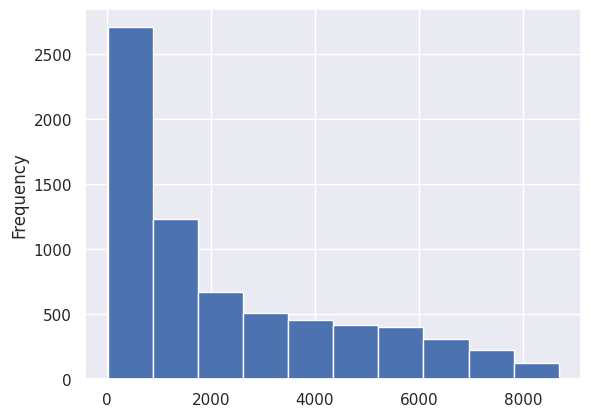

In [13]:
df.TotalCharges.plot(kind='hist')

In [14]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [15]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis

##### Creating **tenure_group** to categorize customers based on their tenure, facilitating analysis of churn patterns by tenure during EDA

In [16]:
bins = [0, 12, 24, 36, 48, 60, np.inf]
labels = ['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '60+ months']

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36 months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48 months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 months


### Check Distribution of Churn Column

<Axes: xlabel='Churn', ylabel='count'>

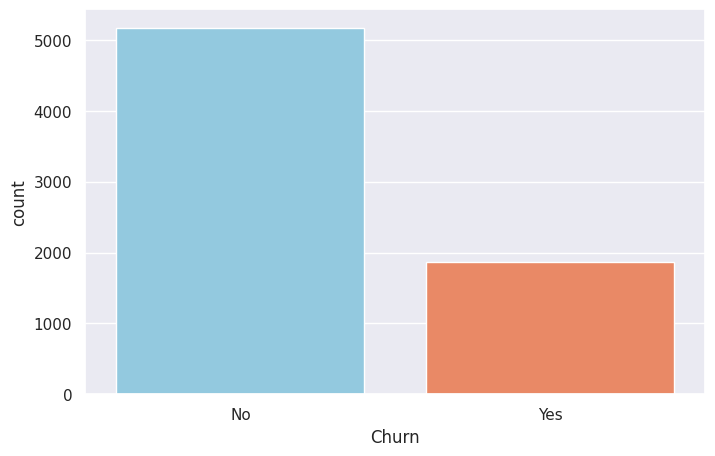

In [23]:
fig, ax = plt.subplots(figsize=(8,5))

palette = {'Yes': 'coral', 'No': 'skyblue'}

sns.countplot(
              data=df,
              x='Churn',
              palette=palette
)

### Explore Different Demographic Segments
- Find out how they relate with churn

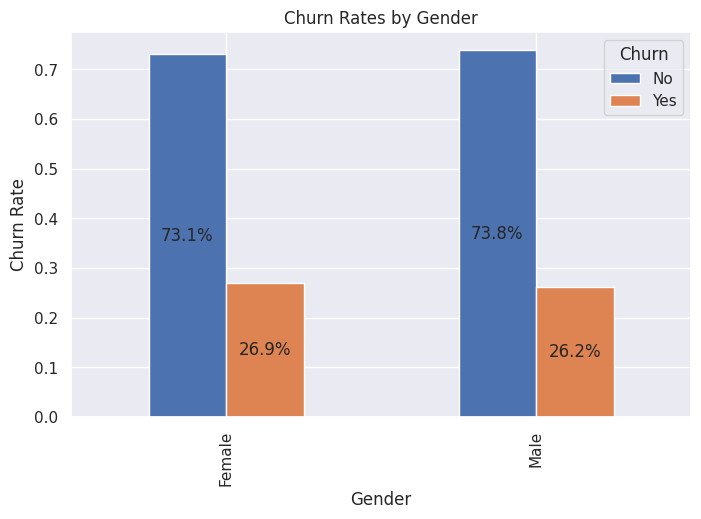

In [24]:
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()

# Visualize churn rates by gender with percentage labels
ax = gender_churn.plot(kind='bar', stacked=False, figsize=(8, 5), title='Churn Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')

# Display percentage labels on each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

The visual analysis of the bar chart depicting churn rates by gender suggests that, at a glance, there may not be a substantial impact of gender on churn.

In [27]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
3136,3884-HCSWG,Female,0,No,No,17,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.00,1144.50,Yes,13-24 months
6080,9526-BIHHD,Male,0,No,No,1,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.70,29.70,Yes,0-12 months
1292,8390-FESFV,Female,0,No,No,62,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),84.50,5193.20,No,60+ months
5112,1383-EZRWL,Female,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,164.85,Yes,0-12 months


In [28]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64